<b>BDS^3</b> Ukrainian Biological Data Science School

2024-06, Uzhzhorod 

<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b> 🦠 Курс "Аналіз мікробіому. Пошук ассоціацій з хворобами"</b> 

<i> by Kateryna Pantiukh </i> 
https://github.com/Chartiza 
</div>

**Практичний блок 5. MWAS**

MWAS (Metagenome-Wide Association Study) — це дослідження, яке використовується для вивчення зв'язків між метагеномом та певними хворобами, станами здоров'я або іншими фенотипами. Подібно до геномних асоціативних досліджень (GWAS), MWAS аналізує велику кількість бактерій одночасно, щоб визначити, які з них асоційовані з цікавим фенотипом.

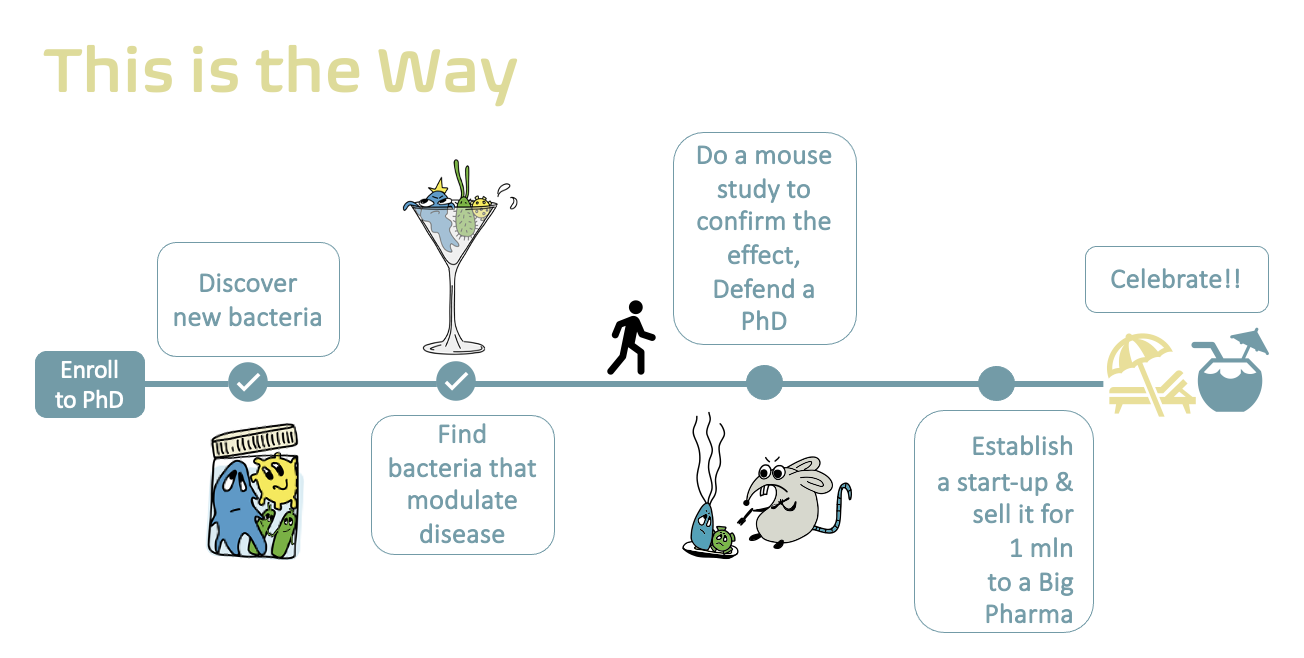

<p><div class="alert-success" style="padding: 20px; border-radius: 10px">
<b> PACKAGES </b> </div>


- Перед початком роботи треба "включити" пакети, які ми будемо використовувати. 
- Якщо це перший раз використання, спочатку требя їх встановити на компьютер за допомогою команді **% pip install package-name**, як наприклад:

<i> % pip install pandas </i>

- Після того як пакети встановленні кожен наступни раз пакет можно зразу "підключити" за допомогою команди **import package-name**

- Для виконання команди треба буде писати назву пакету, тому для зручності ми можемо скоротити назву за допомогою команди **as short_name**, наприклад:

<i> import pandas as pd </i>


In [ ]:
#%pip install pandas

In [7]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.metrics import pairwise_distances
import statsmodels.api as sm

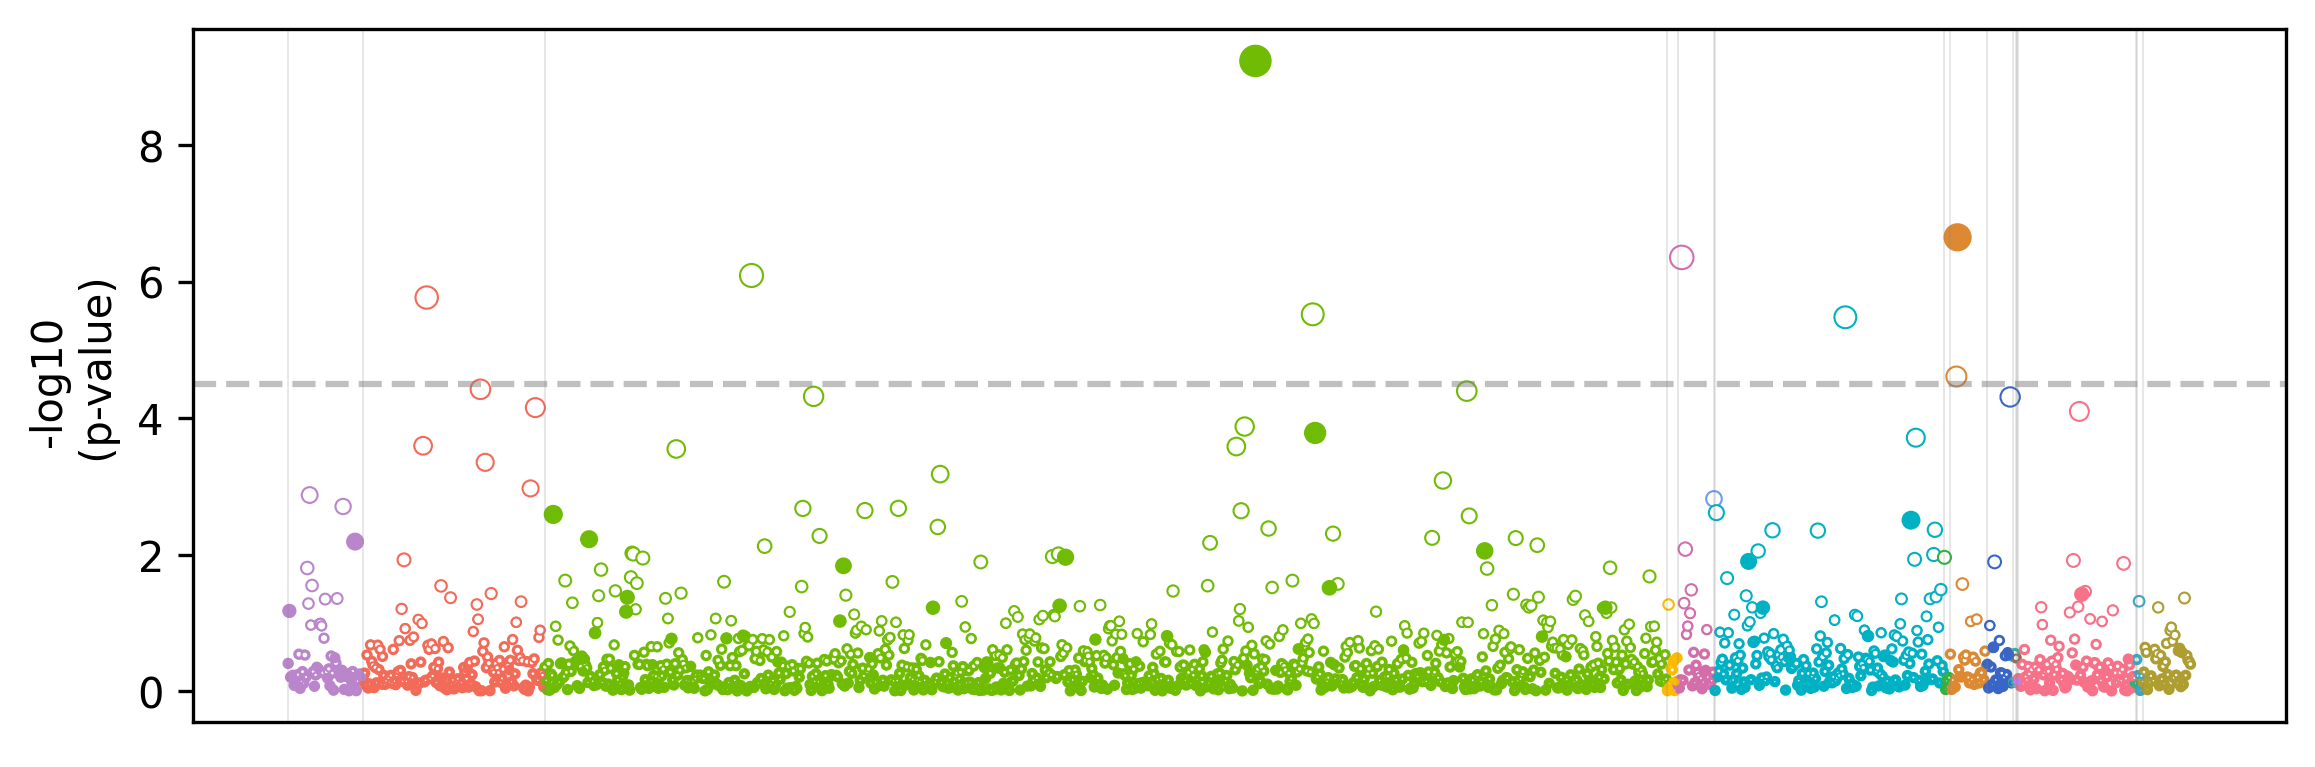

ICD10 code I50: <b>Heart failure</b>

Plot from preprint 10.1101/2024.07.06.602324 has posted on bioRxiv: https://biorxiv.org/cgi/content/short/2024.07.06.602324v1

## Start correlation analysis

<b>Завдання:</b> 
- Який рівень значущості є загальноприйнятним?
- Створіть змінну alpha яка дорівнюю цьому рівню значущості.

<details>
  <summary> Підказка </summary>

    alpha = 0.05
    
    print("alpha:", alpha)

</details>  

In [24]:
# Multiple testing require Bonferoni correction alpha
alpha = alpha / len(meta.columns)
print("alpha after Bonferoni correction:", alpha)

alpha after Bonferoni correction: 0.01


In [25]:
meta = pd.read_csv('input/metadata_table.csv')
meta.head(2)

,SampleID,Age,BMI,Gender,DiseaseStatus
0,MB-4150,39,14.1,1,0
1,MB-4893,72,14.1,1,0


In [26]:
abud = pd.read_csv('input/abundance_table.csv')
abud.rename(columns={'Unnamed: 0': "sample"}, inplace=True)
abud.head(2)

,sample,Bacteroides fragilis,Faecalibacterium prausnitzii,Scatocola faecipullorum,Ruminococcus_E bromii_B,Bacteroides thetaiotaomicron,Prevotella copri,Akkermansia muciniphila,Phocaeicola_A sp900765575,Bifidobacterium longum,...,Bacteroides uniformis,Roseburia intestinalis,Clostridium paraputrificum,Dialister invisus,Parabacteroides distasonis,Merdibacter merdipullorum,Clostridium_A leptum,Phascolarctobacterium faecium,Eubacterium_R faecale,Bacteroides ovatus
0,MB-2860,0.0,0.000000,0.0,0.0,0.0,0.159517,0.0,0.0,0.0,...,0.227268,0.0,0.147433,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,MB-5397,0.0,0.311083,0.0,0.0,0.0,0.199099,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.236952,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
mrg = abud.merge(meta, left_on='sample', right_on='SampleID', how='inner')
mrg.head(2)

,sample,Bacteroides fragilis,Faecalibacterium prausnitzii,Scatocola faecipullorum,Ruminococcus_E bromii_B,Bacteroides thetaiotaomicron,Prevotella copri,Akkermansia muciniphila,Phocaeicola_A sp900765575,Bifidobacterium longum,...,Merdibacter merdipullorum,Clostridium_A leptum,Phascolarctobacterium faecium,Eubacterium_R faecale,Bacteroides ovatus,SampleID,Age,BMI,Gender,DiseaseStatus
0,MB-2860,0.0,0.000000,0.0,0.0,0.0,0.159517,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,MB-2860,52,27.503043,1,0
1,MB-5397,0.0,0.311083,0.0,0.0,0.0,0.199099,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,MB-5397,23,19.961733,1,0


In [29]:
# one phenotype test
ph_name = 'DiseaseStatus'
# Define your covariates
covariates = ['Age', 'BMI', 'Gender']

# perform CLR transformation for columns with bacteria species
tc = len(mrg.columns)-5

# fill NA values with mean
mrg['BMI'].fillna(mrg['BMI'].mean(), inplace=True)
mrg['Gender'].fillna(mrg['Gender'].mean(), inplace=True)
mrg['Age'].fillna(mrg['Age'].mean(), inplace=True)

# create a df with results for each phenotype
df = pd.DataFrame(columns=['bacteria', 'p-value', 'betta'])

n = len(mrg.columns)-5
bac = mrg.columns[1:n]
len(bac)

for b in bac:
    # Create a design matrix by adding the covariates to the model
    X = mrg[covariates + [ph_name]]
    X = sm.add_constant(X)

    y = mrg[b]
    model = sm.OLS(y, X).fit()
    if model.pvalues[ph_name] < alpha:
                print(b)
                print('pValue', model.pvalues[ph_name])  
                print('beta', model.params[ph_name])
                print('-----------------')


Bifidobacterium longum
pValue 0.0009882978398366952
beta 0.10540482430154978
-----------------
Bacteroides ovatus
pValue 0.008940609871037033
beta 0.06904217231202944
-----------------


In [30]:
# one phenotype test
ph_name = 'DiseaseStatus'
# Define your covariates
covariates = ['Age', 'BMI', 'Gender']

# perform CLR transformation for columns with bacteria species
tc = len(mrg.columns)-5

# fill NA values with mean
mrg['BMI'].fillna(mrg['BMI'].mean(), inplace=True)
mrg['Gender'].fillna(mrg['Gender'].mean(), inplace=True)
mrg['Age'].fillna(mrg['Age'].mean(), inplace=True)

# create a df with results for each phenotype
df = pd.DataFrame(columns=['bacteria', 'p-value', 'betta'])

n = len(mrg.columns)-5
bac = mrg.columns[1:n]
len(bac)

for b in bac:
    # Create a design matrix by adding the covariates to the model
    X = mrg[covariates + [ph_name]]
    X = sm.add_constant(X)

    y = mrg[b]
    model = sm.OLS(y, X).fit()
    if model.pvalues[ph_name] < alpha:
        print(b)
        #print(model.pvalues[ph_name])   

        # fill out separete table for phenotype
        rows_to_append = []
        new_row = {'bacteria': b, 'p-value': model.pvalues[ph_name], 'betta': model.params[ph_name]}
        rows_to_append.append(new_row)
        new_data = pd.DataFrame(rows_to_append)
        df = pd.concat([df, new_data], ignore_index=True)

df.sort_values(by=['p-value'], inplace=True)
#df.to_csv('results/Pval.csv', index=False)
df

Bifidobacterium longum
Bacteroides ovatus


,bacteria,p-value,betta
0,Bifidobacterium longum,0.000988,0.105405
1,Bacteroides ovatus,0.008941,0.069042
